# 1.1 Introdução ao modelo de Perceptron

## Explicação conceitual detalhada

### 🔍 O Que é um Perceptron?

O **Perceptron** é o modelo mais simples de uma rede neural artificial, proposto por **Frank Rosenblatt em 1958**. Ele é a base para modelos mais complexos de redes neurais e tem como objetivo simular o comportamento de um **neurônio biológico**, ou seja, aprender a classificar padrões com base em entradas e pesos.

### 🧠 Estrutura do Perceptron

O perceptron é composto por:

- **Entradas (x₁, x₂, ..., xₙ):** são os dados de entrada (valores numéricos).
- **Pesos (w₁, w₂, ..., wₙ):** cada entrada é multiplicada por um peso, que determina a importância daquela entrada.
- **Bias (b):** é um valor fixo que permite ao modelo ajustar o limiar de ativação, deslocando a função de ativação para melhor aprendizado.
- **Função Somatória:** calcula a soma ponderada das entradas com seus respectivos pesos e adiciona o bias.
- **Função de Ativação:** decide se o neurônio será ativado ou não (isto é, se a saída será 1 ou 0).

### 📐 Funcionamento Matemático

A saída do perceptron é dada por:

\\[
u = x_1 w_1 + x_2 w_2 + \\ldots + x_n w_n + b
\\]

Esse valor \\( u \\) é passado por uma **função de ativação**, normalmente o **degrau unitário**:

\\[
f(u) = 
\\begin{cases}
1 & \\text{se } u \\geq 0 \\\\
0 & \\text{se } u < 0
\\end{cases}
\\]


### 🔄 Processo de Aprendizado (Treinamento)

Durante o treinamento, o perceptron ajusta seus pesos e o bias com base no erro cometido ao prever a saída. O processo segue os seguintes passos:

1. **Inicialização:** os pesos e bias começam com valores aleatórios ou zerados.
2. **Cálculo da saída:** calcula a soma ponderada e aplica a função de ativação.
3. **Cálculo do erro:** compara a saída obtida com a saída desejada.
4. **Atualização dos pesos e bias:**

\\[
w_i = w_i + \\eta (y_{desejado} - y_{predito}) x_i
\\]
\\[
b = b + \\eta (y_{desejado} - y_{predito})
\\]

Onde \\( \\eta \\) é a **taxa de aprendizado**, um valor pequeno que controla o quão grande é o passo de correção.


### ✅ Quando o Perceptron Aprende?

O perceptron aprende corretamente **quando todos os erros de classificação são eliminados**, ou seja, quando o modelo consegue prever corretamente todas as saídas esperadas do conjunto de treinamento. Isso acontece apenas se os dados forem **linearmente separáveis**.

### 🎯 Aplicação

O perceptron é útil para introduzir conceitos fundamentais de redes neurais:
- Cálculo de somatórios;
- Uso de funções de ativação;
- Ajuste iterativo de pesos;
- Conceito de aprendizado supervisionado.

## Estrutura básica do Perceptron

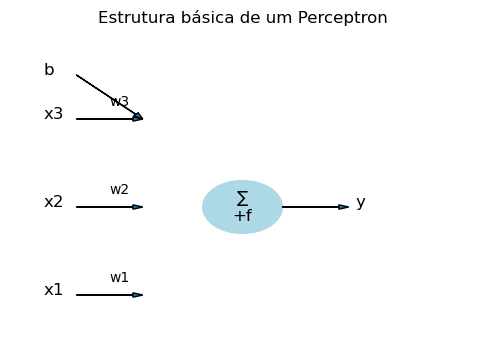

In [1]:
import matplotlib.pyplot as plt

# Gráfico simples da estrutura do Perceptron
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)

# Desenhando as entradas
for i in range(3):
    ax.arrow(0, i*2, 1, 0, head_width=0.1, length_includes_head=True)
    ax.text(-0.5, i*2, f"x{i+1}", fontsize=12)

# Pesos
for i in range(3):
    ax.text(0.5, i*2 + 0.3, f"w{i+1}", fontsize=10)

# Bias
ax.arrow(0, 5, 1, -1, head_width=0.1, length_includes_head=True)
ax.text(-0.5, 5, "b", fontsize=12)

# Neurônio (soma + ativação)
circle = plt.Circle((2.5, 2), 0.6, fill=True, color='lightblue')
ax.add_patch(circle)
ax.text(2.5, 2, "∑\n+f", ha='center', va='center', fontsize=12)

# Saída
ax.arrow(3.1, 2, 1, 0, head_width=0.1, length_includes_head=True)
ax.text(4.2, 2, "y", fontsize=12)

ax.axis('off')
plt.title("Estrutura básica de um Perceptron")
plt.show()

## Fórmulas Matemáticas Detalhadas do Perceptron 📐


A seguir, estão detalhadas as principais fórmulas que regem o funcionamento do Perceptron, com explicações claras de cada etapa.

---

### 1. Soma Ponderada com Bias (Potencial de Ativação)

A primeira operação realizada por um Perceptron é o **cálculo da combinação linear das entradas com os pesos**, somando também o bias (viés).

#### Fórmula:

\\[
u = \\sum_{i=1}^{n} x_i w_i + b
\\]

Ou seja:

\\[
u = x_1 w_1 + x_2 w_2 + x_3 w_3 + \\dots + x_n w_n + b
\\]

#### Onde:
- \\( x_i \\) são as **entradas** (ex: valores de um vetor de características).
- \\( w_i \\) são os **pesos sinápticos**, que indicam a importância de cada entrada.
- \\( b \\) é o **bias**, um valor adicional que permite maior flexibilidade para o limiar da ativação.
- \\( u \\) é o **potencial de ativação**, um valor intermediário antes da função de ativação.

---

### 2. Função de Ativação: Degrau Unitário

Após calcular \\( u \\), aplicamos uma **função de ativação** para decidir se o neurônio "dispara" (saída = 1) ou não (saída = 0). A função mais comum no Perceptron original é o **degrau unitário** (Heaviside).

#### Fórmula:

\\[
f(u) =
\\begin{cases}
1, & \\text{se } u \\geq 0 \\\\
0, & \\text{se } u < 0
\\end{cases}
\\]

#### Por que usar essa função?

- Ela **simula o comportamento de ativação binária** de um neurônio: ou ativa (1) ou não ativa (0).
- Ideal para **tarefas de classificação binária**, como prever 0 ou 1, verdadeiro ou falso.

---

### 3. Função de Custo (Erro Absoluto)

Após obter a saída \\( y \\) do Perceptron, comparamos com a **saída desejada** \\( y_d \\), para avaliar o desempenho do modelo.

#### Fórmula:

\\[
E = y_d - y
\\]

- \\( E \\) é o **erro** da predição.
- \\( y_d \\) é o valor correto (esperado).
- \\( y \\) é o valor previsto pelo Perceptron.

Se \\( E = 0 \\), a predição está correta. Se \\( E \\neq 0 \\), há um erro que será usado para ajustar os pesos.

---

### 4. Regra de Atualização dos Pesos e do Bias

Se o modelo comete erro, ele precisa aprender com isso. A **regra de aprendizado do Perceptron** é baseada no erro e ajusta os pesos e o bias proporcionalmente.

#### Fórmulas:

##### Atualização dos Pesos:

\\[
w_i = w_i + \\eta \\cdot E \\cdot x_i
\\]

##### Atualização do Bias:

\\[
b = b + \\eta \\cdot E
\\]

#### Onde:
- \\( w_i \\): peso da entrada \\( i \\).
- \\( \\eta \\): taxa de aprendizado (*learning rate*), geralmente um valor pequeno como 0.1 ou 0.01.
- \\( E \\): erro obtido.
- \\( x_i \\): valor da entrada.

Essa fórmula garante que:
- Quando o erro é zero, os pesos não são alterados.
- Quando o erro é diferente de zero, os pesos são ajustados na direção que reduz o erro.

---

### 5. Critério de Parada

O treinamento do Perceptron pode parar quando:
1. O erro total nas amostras é igual a zero (o Perceptron aprendeu todas corretamente).
2. Um número fixo de **épocas** (iterações sobre o conjunto de dados) é atingido.

---

## Funcionamento do Algoritmo do Perceptron (Passo a Passo Conceitual)

O Perceptron é um algoritmo de aprendizado supervisionado simples que simula o funcionamento de um neurônio artificial. Ele é utilizado principalmente para **classificação binária**, ou seja, para separar dados em duas classes distintas.



### 1. Inicialização

- O algoritmo começa com a **inicialização dos pesos** (geralmente com valores pequenos ou iguais a zero).
- Também é definido um valor de **bias (viés)**.
- A **taxa de aprendizado** (η) é escolhida — ela determina o "tamanho do passo" durante o ajuste dos pesos.

Esses parâmetros serão ajustados ao longo do treinamento para que o Perceptron aprenda a tomar decisões corretas.


### 2. Apresentação dos Dados

- Os dados de entrada são apresentados **um por um** ao Perceptron.
- Cada dado possui:
  - Um vetor de características (entradas): \\( x_1, x_2, ..., x_n \\)
  - Uma **saída esperada** (classe): 0 ou 1



### 3. Cálculo da Saída

- Para cada amostra, o Perceptron calcula a **soma ponderada das entradas com os pesos**, somando também o bias.
- Em seguida, aplica uma **função de ativação** (normalmente o degrau unitário) que determina se a saída será 0 ou 1.

Essa é a **saída prevista** para aquele padrão.


### 4. Avaliação do Erro

- A saída prevista é comparada com a saída desejada.
- Se estiver correta, nada acontece.
- Se estiver errada, o Perceptron **calcula o erro** (diferença entre a saída desejada e a prevista).


### 5. Atualização dos Pesos e Bias

- Se houver erro, os **pesos e o bias são atualizados** para corrigir a decisão do Perceptron.
- O ajuste depende:
  - Do valor do erro
  - Da taxa de aprendizado
  - Do valor da entrada associada

Dessa forma, o Perceptron vai "aprendendo" com os erros cometidos.



### 6. Repetição por Épocas

- O processo é repetido para **todas as amostras do conjunto de dados**.
- Cada vez que o Perceptron percorre todas as amostras, chamamos de uma **época**.
- Esse ciclo é repetido até que:
  - O Perceptron classifique todos os dados corretamente (erro total = 0), ou
  - Um número máximo de épocas seja atingido



### 7. Convergência do Algoritmo

- Se os dados forem **linearmente separáveis**, o Perceptron sempre convergirá (ou seja, aprenderá a classificá-los corretamente).
- Caso contrário, o Perceptron pode **nunca acertar tudo**, por isso é importante definir um **critério de parada** (ex: 1000 épocas).


### ✅ Resumo Geral

O algoritmo do Perceptron segue este fluxo:

1. Inicializar pesos e bias
2. Para cada entrada:
   - Calcular a saída prevista
   - Comparar com a saída correta
   - Atualizar pesos e bias, se necessário
3. Repetir até o modelo aprender ou atingir o limite de épocas

# 1.2 Aplicação do Perceptron aos Problemas Lógicos OR e AND

Nesta seção, aplicamos a implementação manual do Perceptron para resolver os problemas clássicos de lógica booleana: **OR** e **AND**. Ambos são exemplos de problemas **linearmente separáveis**, ou seja, existe uma linha reta que separa as classes.

Será feito o seguinte:
- Criação manual dos datasets OR e AND
- Implementação do algoritmo do Perceptron para treinar e testar nesses datasets
- Gráficos demonstrando o treinamento e resultados
- Explicação detalhada das decisões gráficas (fronteiras de decisão)

## Criação manual dos datasets OR e AND

In [2]:
# Dados manuais para OR e AND
# Cada entrada: [x1, x2]
# Saída esperada: 0 ou 1

# Problema OR
dados_or = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 1)
]

# Problema AND
dados_and = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

## Implementação do algoritmo do Perceptron para treinar e testar nesses datasets

In [3]:
#Função do Perceptron Manual

import random

def degrau(u):
    return 1 if u >= 0 else 0

def treinar_perceptron(dados, taxa_aprendizado=0.1, epocas=20):
    pesos = [random.uniform(-1, 1) for _ in range(2)]
    bias = random.uniform(-1, 1)
    
    historico_pesos = []
    historico_erros = []

    for epoca in range(epocas):
        erro_total = 0

        for entrada, esperado in dados:
            # Cálculo manual do somatório: u = x1*w1 + x2*w2 + b
            u = 0
            for i in range(len(entrada)):
                u += entrada[i] * pesos[i]
            u += bias

            # Saída do Perceptron
            y = degrau(u)

            # Erro
            erro = esperado - y
            erro_total += abs(erro)

            # Atualização dos pesos e bias (manual)
            for i in range(len(pesos)):
                pesos[i] += taxa_aprendizado * erro * entrada[i]
            bias += taxa_aprendizado * erro

        historico_pesos.append((pesos.copy(), bias))
        historico_erros.append(erro_total)

        if erro_total == 0:
            break

    return pesos, bias, historico_pesos, historico_erros

## Gráficos demonstrando o treinamento e resultados

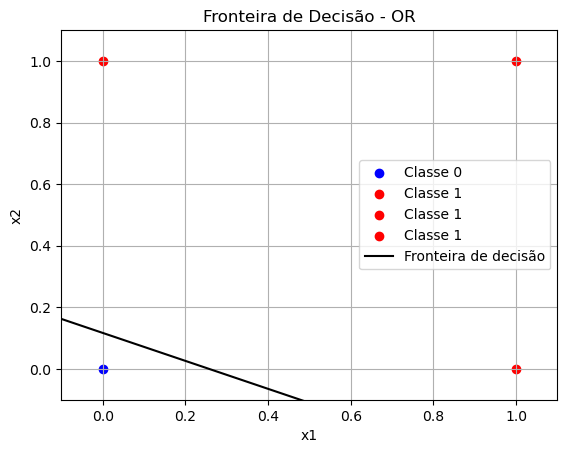

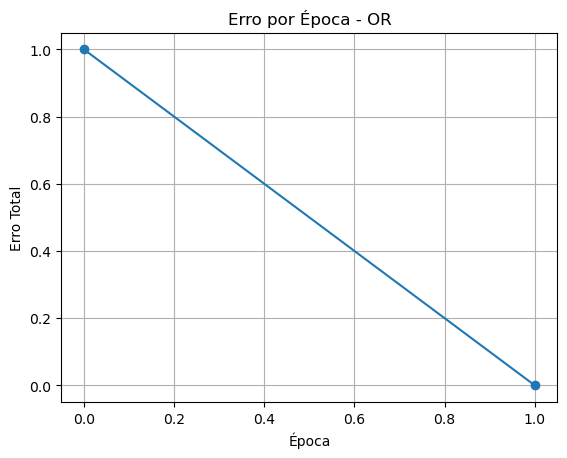

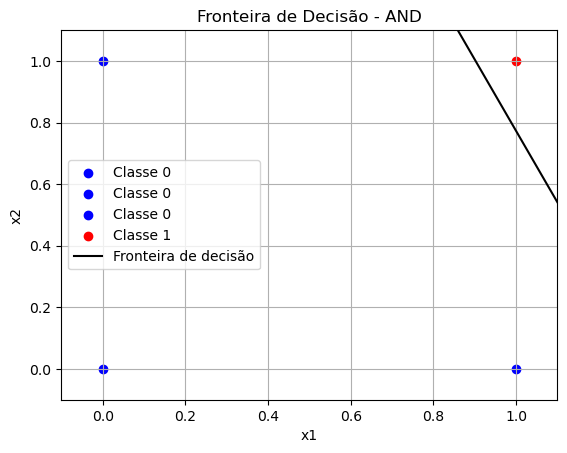

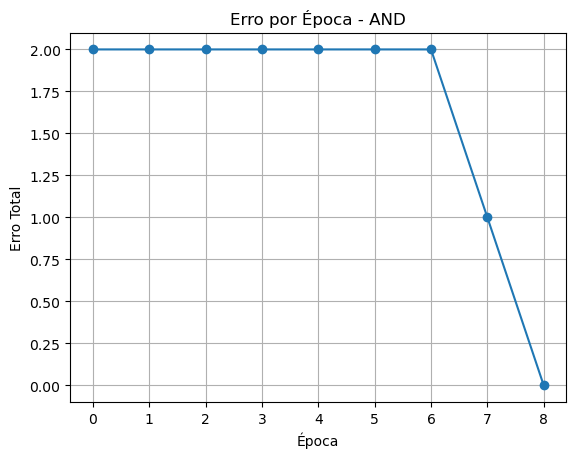

In [4]:
#Treinamento OR e AND + Gráficos

import matplotlib.pyplot as plt
import numpy as np

def plot_resultado(dados, pesos, bias, titulo):
    x = np.linspace(-0.1, 1.1, 100)
    y = -(pesos[0] * x + bias) / pesos[1]

    # Pontos
    for entrada, esperado in dados:
        cor = 'blue' if esperado == 0 else 'red'
        plt.scatter(entrada[0], entrada[1], color=cor, label=f"Classe {esperado}")

    # Linha de decisão
    plt.plot(x, y, '-k', label='Fronteira de decisão')

    plt.title(titulo)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.show()

def plot_erro(historico_erros, titulo):
    plt.plot(historico_erros, marker='o')
    plt.title(titulo)
    plt.xlabel("Época")
    plt.ylabel("Erro Total")
    plt.grid(True)
    plt.show()

# OR
pesos_or, bias_or, hist_pesos_or, hist_erros_or = treinar_perceptron(dados_or)
plot_resultado(dados_or, pesos_or, bias_or, "Fronteira de Decisão - OR")
plot_erro(hist_erros_or, "Erro por Época - OR")

# AND
pesos_and, bias_and, hist_pesos_and, hist_erros_and = treinar_perceptron(dados_and)
plot_resultado(dados_and, pesos_and, bias_and, "Fronteira de Decisão - AND")
plot_erro(hist_erros_and, "Erro por Época - AND")

## Explicação Gráfica das Decisões do Perceptron

### Problema OR

No problema OR, o Perceptron aprendeu uma **fronteira de decisão linear** que separa corretamente os casos onde pelo menos uma das entradas é 1. A linha traçada no gráfico mostra essa separação: acima dela a saída é 1, abaixo é 0.

Isso mostra que o Perceptron **consegue aprender a função OR** corretamente, pois ela é linearmente separável.

### Problema AND

No caso do AND, o Perceptron também teve sucesso. Ele traçou uma fronteira que separa corretamente a única combinação onde ambas as entradas são 1 (saída 1) das outras três (saída 0). Como o AND também é linearmente separável, o algoritmo converge bem.

### Erro por Época

Nos dois problemas, o gráfico de erro mostra uma **redução rápida do erro total**, até chegar a zero. Isso confirma que o modelo **convergiu** para uma solução correta com os dados apresentados.

---

**Observação:** Essas simulações são possíveis porque tanto OR quanto AND são problemas **linearmente separáveis**. O Perceptron não consegue resolver o problema XOR, por exemplo, que não é separável por linha reta.

# 1.3 Discussão do problema XOR e suas implicações para a evolução das redes neurais

O **problema XOR** (OU Exclusivo) é um problema clássico que expõe as limitações do Perceptron. Neste exercício, vamos demonstrar como o Perceptron não consegue resolver esse problema e discutir como isso levou ao desenvolvimento de **redes neurais multicamadas** (MLP).

---

## Problema XOR

O problema XOR envolve quatro possíveis combinações de entradas (x1, x2) e suas respectivas saídas esperadas:
- (0, 0) → 0
- (0, 1) → 1
- (1, 0) → 1
- (1, 1) → 0

Embora a função XOR seja simples, ela não pode ser representada com uma **linha reta**, ou seja, não é linearmente separável. Isso é o que torna esse problema um desafio para o Perceptron.

## Demonstração Gráfica do Problema XOR

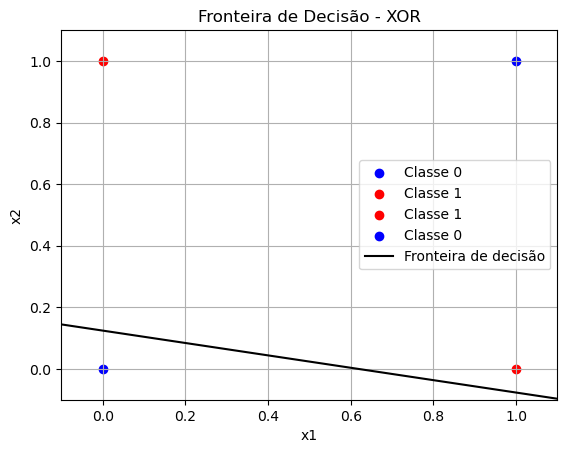

In [5]:
# Dados manuais para o problema XOR
dados_xor = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0)
]

# Treinamento com o Perceptron para o problema XOR
pesos_xor, bias_xor, hist_pesos_xor, hist_erros_xor = treinar_perceptron(dados_xor)

# Função para plotar o resultado do XOR
def plot_resultado_xor(dados, pesos, bias, titulo):
    x = np.linspace(-0.1, 1.1, 100)
    y = -(pesos[0] * x + bias) / pesos[1]

    # Pontos
    for entrada, esperado in dados:
        cor = 'blue' if esperado == 0 else 'red'
        plt.scatter(entrada[0], entrada[1], color=cor, label=f"Classe {esperado}")

    # Linha de decisão
    plt.plot(x, y, '-k', label='Fronteira de decisão')

    plt.title(titulo)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.show()

# Gráfico do XOR
plot_resultado_xor(dados_xor, pesos_xor, bias_xor, "Fronteira de Decisão - XOR")

## Análise gráfica e incapacidade do Perceptron em resolver o problema XOR


No gráfico acima, podemos ver que o **Perceptron não consegue separar as classes** do problema XOR com uma única linha reta. As classes "0" e "1" estão misturadas e não podem ser separadas linearmente. Isso mostra claramente a limitação do Perceptron, que só é capaz de resolver problemas **linearmente separáveis**.

Por exemplo, o Perceptron consegue resolver problemas como **OR** e **AND**, pois há uma linha reta que separa perfeitamente as classes. No entanto, o XOR não tem essa característica, o que faz com que o Perceptron falhe em encontrar uma solução viável para esse problema.

---


## Discussão conceitual sobre a limitação do modelo linear

O Perceptron, por ser um modelo **linear** (ou seja, ele aprende uma linha reta ou plano para separar as classes), não consegue resolver problemas em que as classes não podem ser separadas dessa forma. O XOR é um exemplo clássico de problema **não linearmente separável**, o que significa que não existe uma única linha reta que possa separar corretamente os exemplos onde a saída é 1 dos exemplos onde a saída é 0.

---

## Contextualização Histórica

Na década de 1960, **Frank Rosenblatt** desenvolveu o Perceptron, e esse modelo foi inicialmente visto como uma solução poderosa para redes neurais. Porém, a limitação de não conseguir resolver problemas como o XOR levou ao **declínio temporário das redes neurais** e à ideia de que essas redes não seriam tão úteis quanto inicialmente se pensava.

Foi somente **nos anos 80**, com a introdução das **redes neurais multicamadas (MLP)** e do algoritmo de **retropropagação** (backpropagation), que as redes neurais puderam resolver problemas não linearmente separáveis como o XOR. Esse avanço foi crucial para o renascimento das redes neurais e o desenvolvimento de modelos mais sofisticados, como as redes profundas atuais.

---

### Como isso levou à Evolução das Redes Neurais

O **fracasso do Perceptron** em resolver problemas como o XOR foi um dos principais motivos para o desenvolvimento de redes **multicamadas**. Em vez de usar apenas uma camada de neurônios, as **redes multicamadas (MLP)** introduzem múltiplas camadas de neurônios, permitindo a modelagem de problemas **não linearmente separáveis**.

A **retropropagação (backpropagation)**, que se tornou viável nas redes multicamadas, foi a chave para o renascimento das redes neurais e o início do desenvolvimento de **redes profundas**.

Essas redes conseguem aprender representações mais complexas e resolver problemas como o XOR, que não eram possíveis para modelos lineares simples como o Perceptron.

## Conclusão

- **Problema XOR**: O Perceptron não consegue resolver o problema XOR, pois ele é **não linearmente separável**, o que é uma limitação do modelo linear do Perceptron.
- **Implicações**: Esse fracasso levou ao **desinteresse temporário nas redes neurais** e ao reconhecimento da necessidade de **redes multicamadas** para resolver problemas mais complexos.
- **Desenvolvimento das MLPs**: As redes neurais **multicamadas (MLP)** e o algoritmo de **retropropagação** (backpropagation) permitiram que redes neurais fossem capazes de aprender funções **não lineares**, como o XOR, e isso abriu caminho para a evolução das redes neurais modernas.

Essas descobertas impulsionaram o campo das redes neurais, que, com o tempo, evoluíram para as **redes profundas** que estão sendo usadas em diversas áreas, como visão computacional, processamento de linguagem natural e aprendizado profundo (deep learning).